<a href="https://colab.research.google.com/github/mkjubran/ENEE4103/blob/master/Delta_Modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DELTA MODULATION**

**OBJECTIVES**

*In this Experiment we will introduce delta modulation and study the following:*

- Linear Delta Modulation for various types of messages.
- Study slope overload and granualr noises for LDM.
- Introduce two algorithms for adaptive (nonlinear) delta modulation for various types of messages.
- Line coding for both types.
- Comparison of both types in terms of noise and line coding.
- Demodulation for both types.

 **Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy.signal import butter,filtfilt
import plotly.graph_objects as go

### **Message Signals**

Define the message signals:

  $m1(t)=3t$

  $m2(t)=sgn(A_msin(2 \pi f_mt))$

  $m3(t)=A_msin(2 \pi f_mt)$

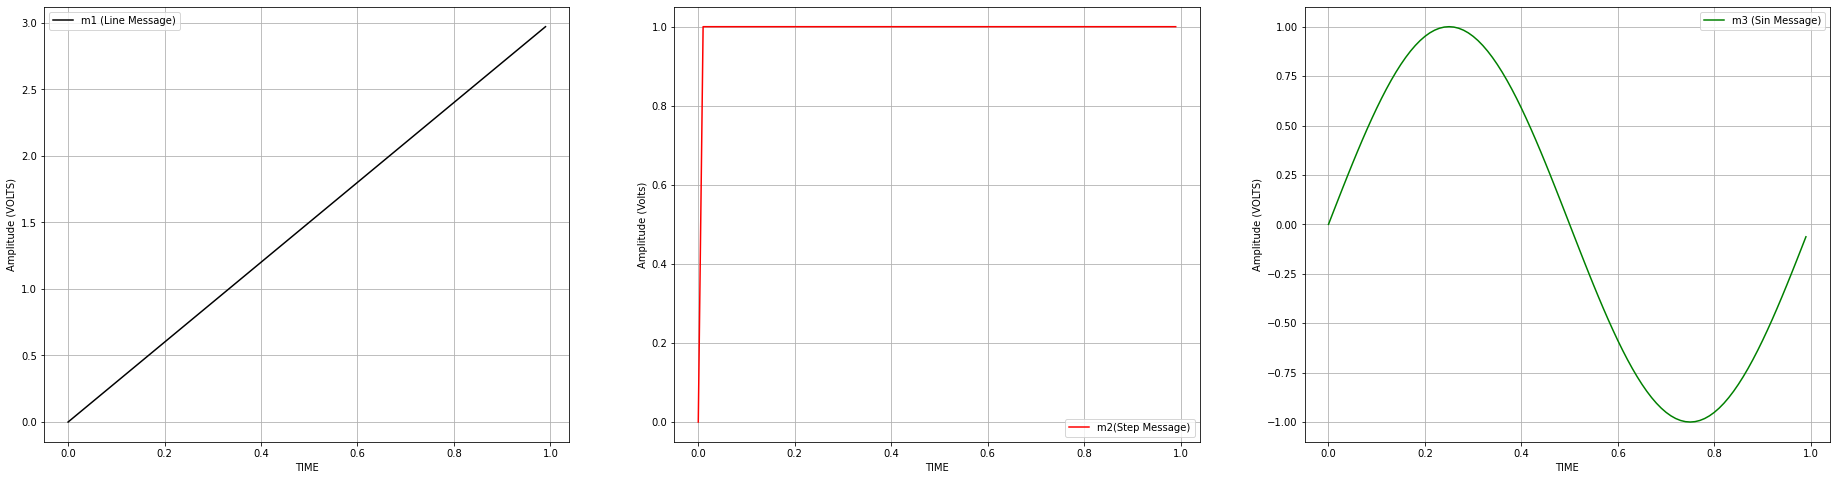

In [ ]:
Tstart=0
Tstop=1
Tstep=1e-2
t=np.arange(Tstart,Tstop,Tstep)
 
fm3=1
Am3=1
 
fm2=0.5
Am2=1
 
m1 = 3*t                                     # Line Message
m2 = np.sign(np.sin(2*np.pi*fm2*t))          # Step Message 
m3 = Am3*np.sin(2*np.pi*fm3*t)               # Sin Message
 
#Plotting the message signals
 
f = plt.figure(figsize=(32,8))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
 
 
ax1.plot(t,m1,'k',label='m1 (Line Message)')
ax1.grid()
ax1.set_xlabel('TIME')
ax1.set_ylabel('Amplitude (VOLTS)')
ax1.legend()
 
ax2.plot(t,m2,'r',label='m2(Step Message)')
ax2.grid()
ax2.set_xlabel('TIME')
ax2.set_ylabel('Amplitude (Volts)')
ax2.legend()
 
ax3.plot(t,m3,'g',label='m3 (Sin Message)')
ax3.grid()
ax3.set_xlabel('TIME')
ax3.set_ylabel('Amplitude (VOLTS)')
ax3.legend()

### **Performance of Linear Delta Modulation (LDM) on the 3 Messages**

*Delta modulation could be though of as a 1 bit quantizer, such that the quantized singal is based on the error and not the actual message signal. The following equations describe said relation:*



$e[n] = m[n] - m_q[n-1]$

$e_q[n] = Δsgn(e[n])$

$m_q[n] = m_q[n-1] + e_q[n]$


The code below demostrates linear delta modulation on the three messages with a step size or Δ of $4 \pi/100$. 


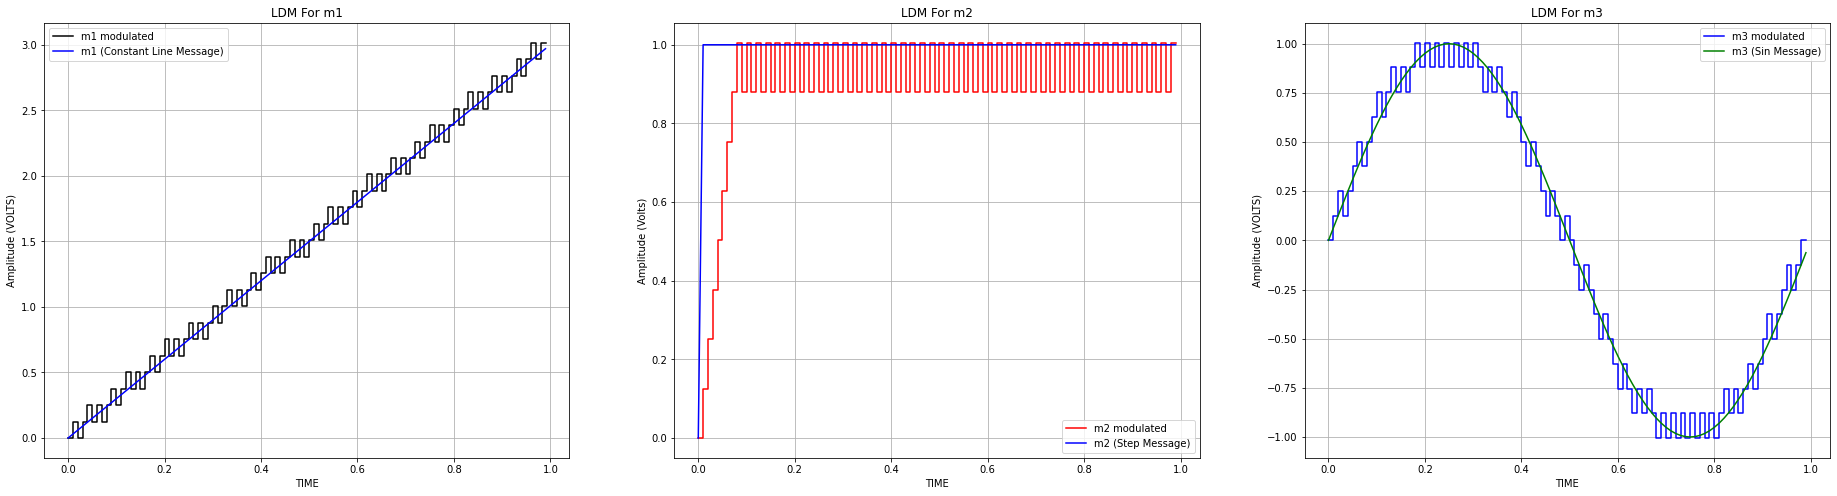

In [ ]:
Tstart=0
Tstop=1
Tstep=1e-2
t=np.arange(Tstart,Tstop,Tstep)
 
fm3=1
Am3=1
 
fm2=0.5
Am2=1
 
m1 = 3*t                                     # Line Message
m2 = np.sign(np.sin(2*np.pi*fm2*t))          # Step Message 
m3 = Am3*np.sin(2*np.pi*fm3*t)               # Sin Message
 
d=4*np.pi/100                                # Delta or Step Size
 
T = len(t)
n=np.arange(0,T,1)
N = len(n)
 
mq1 = np.zeros(N)
e1 = np.zeros(N)
eq1 = np.zeros(N)
bit_s1 = np.zeros(N)
dem1= np.zeros(N)
mdem1= np.zeros(N)
 
mq2 = np.zeros(N)
e2 = np.zeros(N)
eq2 = np.zeros(N)
bit_s2 = np.zeros(N)
dem2= np.zeros(N)
mdem2= np.zeros(N)
 
mq3 = np.zeros(N)
e3 = np.zeros(N)
eq3 = np.zeros(N)
bit_s3 = np.zeros(N)
dem3= np.zeros(N)
mdem3= np.zeros(N)
 
 
 
#modulation
 
for x in n:
 
  if x==1:
    e1[x]=m1[x]                                         # Initialize first quantized sample for m1
    eq1[x]=d*np.sign(e1[x])                          
    mq1[x]=0 
 
    e2[x]=m2[x]                                         # Initialize first quantized sample for m2
    eq2[x]=d*np.sign(e2[x])
    mq2[x]=0   
 
    e3[x]=m3[x]                                         # Initialize first quantized sample for m3
    eq3[x]=d*np.sign(e3[x])
    mq3[x]=0      
    
  else: 
 
    e1[x]=m1[x]-mq1[x-1]                                # Performing LDM for m1
    eq1[x]=d*np.sign(e1[x])        
    mq1[x]=mq1[x-1]+eq1[x] 
 
    e2[x]=m2[x]-mq2[x-1]                                # Performing LDM for m1
    eq2[x]=d*np.sign(e2[x])        
    mq2[x]=mq2[x-1]+eq2[x]  
 
    e3[x]=m3[x]-mq3[x-1]                                # Performing LDM for m1
    eq3[x]=d*np.sign(e3[x])        
    mq3[x]=mq3[x-1]+eq3[x]  
 
                        
#Plotting the modulated signals
 
 
f = plt.figure(figsize=(32,8))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
 
 
ax1.step(t,mq1,'k',label='m1 modulated')
ax1.plot(t,m1,'b',label='m1 (Constant Line Message)')
ax1.grid()
ax1.set_xlabel('TIME')
ax1.set_ylabel('Amplitude (VOLTS)')
ax1.set_title('LDM For m1')
ax1.legend()
 
ax2.step(t,mq2,'r',label='m2 modulated')
ax2.plot(t,m2,'b',label='m2 (Step Message)')
ax2.grid()
ax2.set_xlabel('TIME')
ax2.set_ylabel('Amplitude (Volts)')
ax2.set_title('LDM For m2')
ax2.legend()
 
ax3.step(t,mq3,'b',label='m3 modulated')
ax3.plot(t,m3,'g',label='m3 (Sin Message)')
ax3.grid()
ax3.set_xlabel('TIME')
ax3.set_ylabel('Amplitude (VOLTS)')
ax3.set_title('LDM For m3')
ax3.legend()

 **Discuss the following in the report:**

- *How does the message characteristics ($f_m,A_m...etc$) affect the performance of LDM?*

 **A closer look at the operation of LDM for a sin wave message** 

 A sin wave message (  $m3(t)=A_msin(2 \pi f_mt)$) was used to demostrate a better understanding on the operation of LDM. 

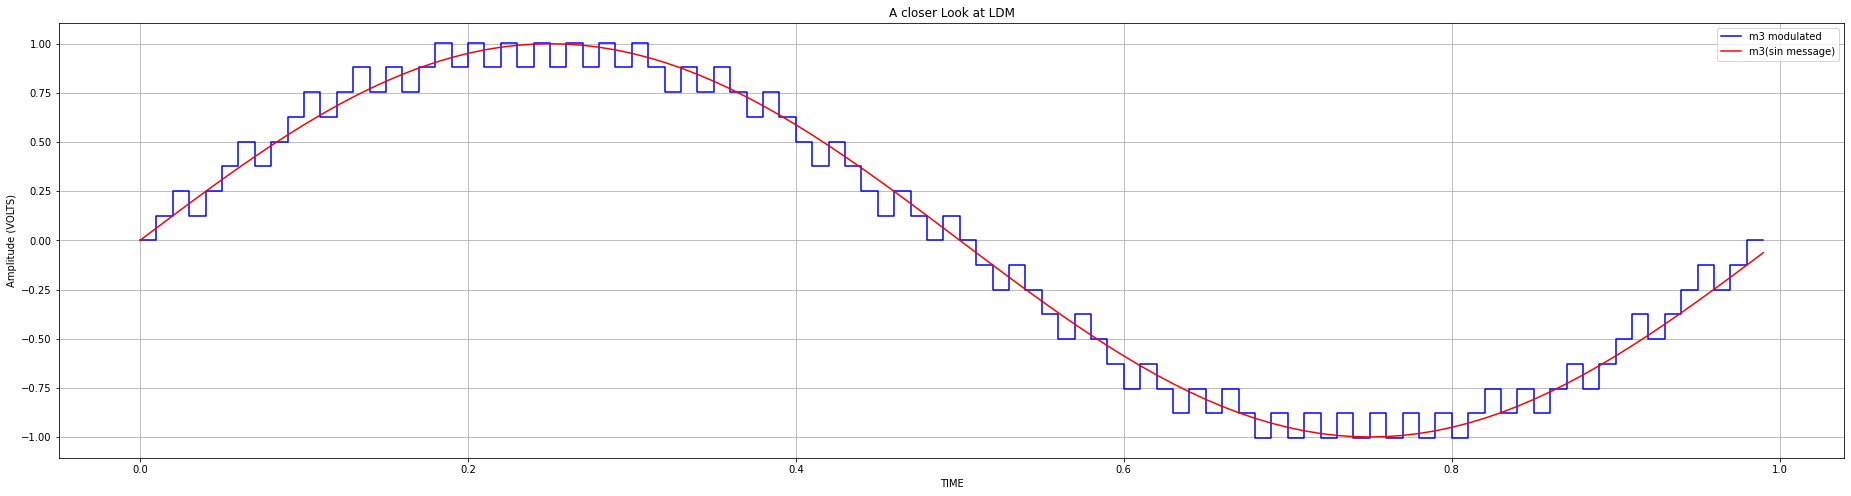

In [ ]:
plt.figure(figsize=(32,8))
plt.step(t,mq3,'b',label='m3 modulated')
plt.plot(t,m3,'r-',label='m3(sin message)')
plt.xlabel('TIME')
plt.ylabel('Amplitude (VOLTS)')
plt.title('A closer Look at LDM')
plt.legend()
plt.grid()

- It can be seen from the above figure that as the step size or delta is **higher** than the message signal(in red), a **reduction** of ***one delta*** is added to the staircase, on the other hand, if the delta is lower than the message signal, an increase of ***one delta*** is made. 

- Another point to take into account is that the value of delta is constant, hence the name linear delta modulation.

### **Line coding for LDM**



- The section below shows the final part of the **modulation** process, where the quantized error ($e_q[n]$) is encoded into binary. 

- For an $e_q[n]$>0 a **1 bit** is sent otherwise, a **0** is sent to the reciever side. 

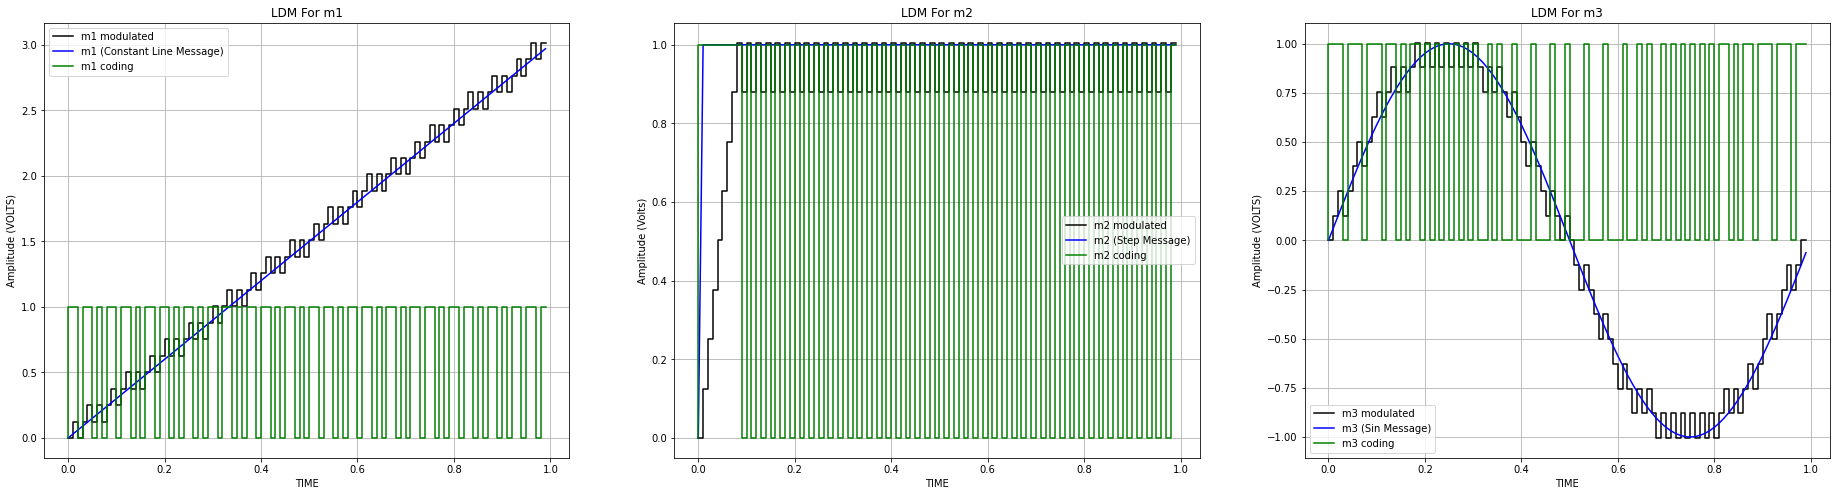

In [ ]:
Tstart=0
Tstop=1
Tstep=1e-2
t=np.arange(Tstart,Tstop,Tstep)

fm3=1
Am3=1

fm2=0.5
Am2=1

m1 = 3*t                                     # Line Message
m2 = np.sign(np.sin(2*np.pi*fm2*t))          # Step Message 
m3 = Am3*np.sin(2*np.pi*fm3*t)               # Sin Message

d=4*np.pi/100                                # Delta or Step Size

T = len(t)
n=np.arange(0,T,1)
N = len(n)

mq1 = np.zeros(N)
e1 = np.zeros(N)
eq1 = np.zeros(N)
bit_s1 = np.zeros(N)
dem1= np.zeros(N)
mdem1= np.zeros(N)

mq2 = np.zeros(N)
e2 = np.zeros(N)
eq2 = np.zeros(N)
bit_s2 = np.zeros(N)
dem2= np.zeros(N)
mdem2= np.zeros(N)

mq3 = np.zeros(N)
e3 = np.zeros(N)
eq3 = np.zeros(N)
bit_s3 = np.zeros(N)
dem3= np.zeros(N)
mdem3= np.zeros(N)



#modulation

for x in n:

  if x==1:
    e1[x]=m1[x]                                         # Initialize first quantized sample for m1
    eq1[x]=d*np.sign(e1[x])                          
    mq1[x]=0 

    e2[x]=m2[x]                                         # Initialize first quantized sample for m2
    eq2[x]=d*np.sign(e2[x])
    mq2[x]=0   

    e3[x]=m3[x]                                         # Initialize first quantized sample for m3
    eq3[x]=d*np.sign(e3[x])
    mq3[x]=0      
    
  else: 

    e1[x]=m1[x]-mq1[x-1]                                # Performing LDM for m1
    eq1[x]=d*np.sign(e1[x])        
    mq1[x]=mq1[x-1]+eq1[x] 

    e2[x]=m2[x]-mq2[x-1]                                # Performing LDM for m1
    eq2[x]=d*np.sign(e2[x])        
    mq2[x]=mq2[x-1]+eq2[x]  

    e3[x]=m3[x]-mq3[x-1]                                # Performing LDM for m1
    eq3[x]=d*np.sign(e3[x])        
    mq3[x]=mq3[x-1]+eq3[x]  


  if eq1[x] > 0:                 # Encoding the error at the transmitter for m1 
     bit_s1[x] = 1
     dem1[x] = d                 # Decoding the received bits at the receiver for m1

  else:
    bit_s1[x] = 0
    dem1[x] = -d 

  if eq2[x] > 0:
     bit_s2[x] = 1
     dem2[x] = d

  else:
    bit_s2[x] = 0
    dem2[x] = -d 


  if eq3[x] > 0:
     bit_s3[x] = 1
     dem3[x] = d
  
  else:
     bit_s3[x] = 0
     dem3[x] = -d
  
  mdem1[x] = sum(dem1)           # Performing demodulation by summing the delta values
  mdem2[x] = sum(dem2)
  mdem3[x] = sum(dem3)

f = plt.figure(figsize=(32,8))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

#Plotting

ax1.step(t,mq1,'k',label='m1 modulated')
ax1.plot(t,m1,'b',label='m1 (Constant Line Message)')
ax1.step(t,bit_s1,'g',label='m1 coding')
ax1.grid()
ax1.set_xlabel('TIME')
ax1.set_ylabel('Amplitude (VOLTS)')
ax1.set_title('LDM For m1')
ax1.legend()

ax2.step(t,mq2,'k',label='m2 modulated')
ax2.plot(t,m2,'b',label='m2 (Step Message)')
ax2.step(t,bit_s2,'g',label='m2 coding')
ax2.grid()
ax2.set_xlabel('TIME')
ax2.set_ylabel('Amplitude (Volts)')
ax2.set_title('LDM For m2')
ax2.legend()

ax3.step(t,mq3,'k',label='m3 modulated')
ax3.plot(t,m3,'b',label='m3 (Sin Message)')
ax3.step(t,bit_s3,'g',label='m3 coding')
ax3.grid()
ax3.set_xlabel('TIME')
ax3.set_ylabel('Amplitude (VOLTS)')
ax3.set_title('LDM For m3')
ax3.legend()


 


 **Discuss the following in the report:**

- *Difference between linear delta modulation and a linear 4 bit quantizer.*
- *From the above results, discuss 1 advantage and 1 disadvantage of LDM.*

 **A closer Look at LDM Line Coding**

A sin wave message (  $m3(t)=A_msin(2 \pi f_mt)$) was used to demostrate a better understanding on the line coding of LDM.

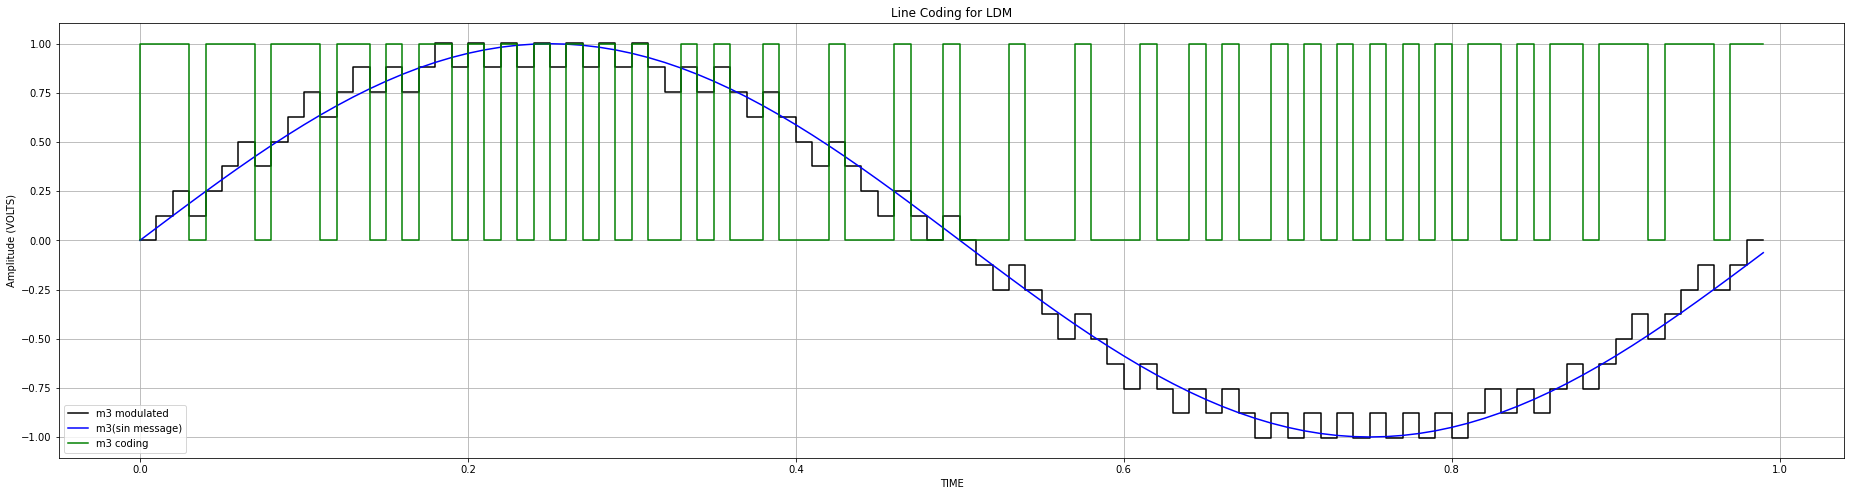

In [ ]:
plt.figure(figsize=(32,8))
plt.step(t,mq3,'k',label='m3 modulated')
plt.plot(t,m3,'b',label='m3(sin message)')
plt.step(t,bit_s3,'g',label='m3 coding')
plt.xlabel('TIME')
plt.ylabel('Amplitude (VOLTS)')
plt.title('Line Coding for LDM')
plt.legend()
plt.grid()


- It can be seen from the above figure that a **bit of 1** is assigned if the staircase signal is increasing i.e. **adding deltas**, and a **0** is assigned otherwise. 

 **Exercise** 
- *Write down the bit sequence for half a period (0-0.5s) of the message.*
- *What is the relation between the first and second halves in terms of the bit sequence?*

### **Noises in Delta Modulation** 

The section below demonstrates the main drawbacks of delta modulation. 

- When the message signal varies at a higher rate than the rate of step change, a form of error takes place known as **slope overeload distortion**. To avoid such noise, one should keep in mind the following relation:

$Δ/T_s>= max(|d(m(t))/d(t)|)$

$Δ/T_s >= 2*\pi*f_m*A_m$ (for a sin message)

*Where $T_s$ is the sampling time, $f_m$ and $A_m$ are the message frequency and amplitude respectively.*


- Another distortion occures when the message signal is constant or varies at a very low rate compared to $Δ/Ts$. This type of noise is known as **Granular noise**. To avoid it, the step sizr should be small, hence creating a compromise between the two types of noises. 


*Note that to observe the noise, $f_m$(sin wave frequency) was **doubled**, the slope of message ***$m_1$*** was **tripled**, and the ***step size(delta)*** was **halved**.*

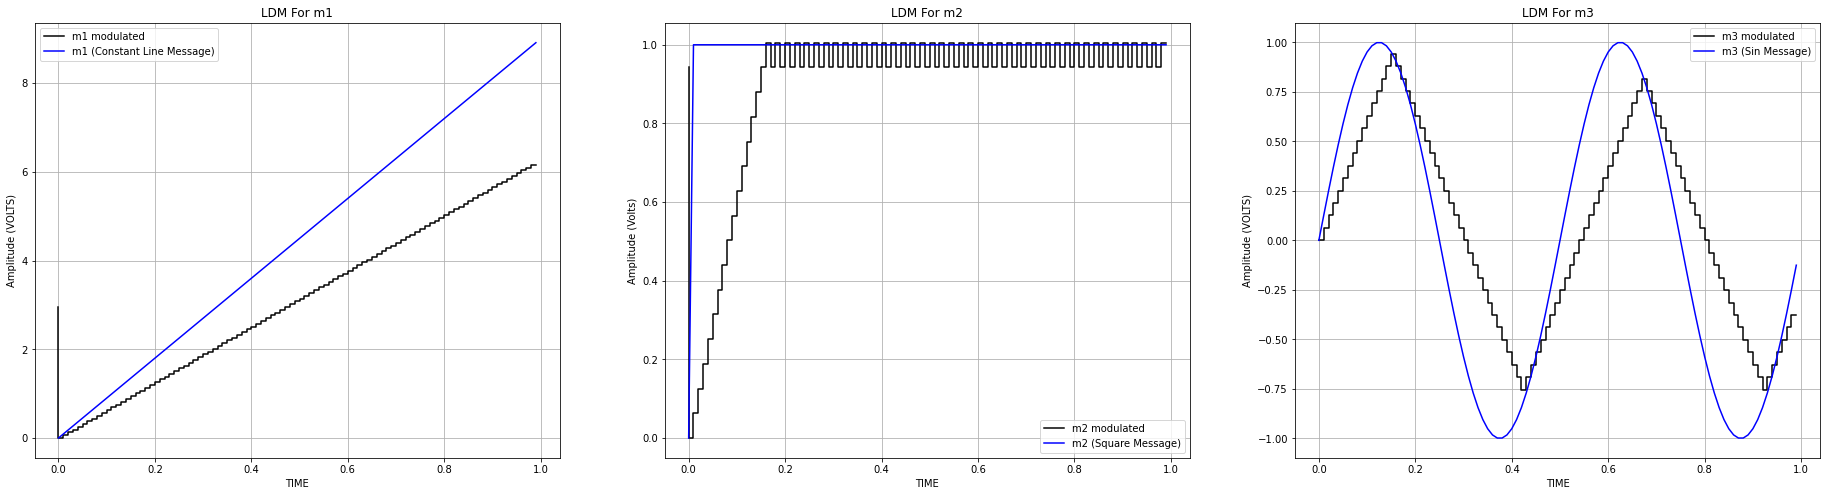

In [ ]:
Tstart=0
Tstop=1
Tstep=1e-2
t=np.arange(Tstart,Tstop,Tstep)

fm3=2                                        # Double the frequecny of the sin message 
Am3=1

fm2=0.5
Am2=1

m1 = 9*t                                     # Tripling the slope for the Line Message
m2 = np.sign(np.sin(2*np.pi*fm2*t))          # Step Message
m3 = Am3*np.sin(2*np.pi*fm3*t)               # Sin Message

d=2*np.pi/100                                # Step size was halved

#modulation

for x in n:

  if x==1:
    e1[x]=m1[x]                   
    eq1[x]=d*np.sign(e1[x])
    mq1[x]=0 

    e2[x]=m2[x]                   
    eq2[x]=d*np.sign(e2[x])
    mq2[x]=0   

    e3[x]=m3[x]                   
    eq3[x]=d*np.sign(e3[x])
    mq3[x]=0      
    
  else: 

    e1[x]=m1[x]-mq1[x-1]          
    eq1[x]=d*np.sign(e1[x])        
    mq1[x]=mq1[x-1]+eq1[x] 

    e2[x]=m2[x]-mq2[x-1]          
    eq2[x]=d*np.sign(e2[x])        
    mq2[x]=mq2[x-1]+eq2[x]  

    e3[x]=m3[x]-mq3[x-1]          
    eq3[x]=d*np.sign(e3[x])        
    mq3[x]=mq3[x-1]+eq3[x]  

f = plt.figure(figsize=(32,8))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)


ax1.step(t,mq1,'k',label='m1 modulated')
ax1.plot(t,m1,'b',label='m1 (Constant Line Message)')
ax1.grid()
ax1.set_xlabel('TIME')
ax1.set_ylabel('Amplitude (VOLTS)')
ax1.set_title('LDM For m1')
ax1.legend()

ax2.step(t,mq2,'k',label='m2 modulated')
ax2.plot(t,m2,'b',label='m2 (Square Message)')
ax2.grid()
ax2.set_xlabel('TIME')
ax2.set_ylabel('Amplitude (Volts)')
ax2.set_title('LDM For m2')
ax2.legend()

ax3.step(t,mq3,'k',label='m3 modulated')
ax3.plot(t,m3,'b',label='m3 (Sin Message)')
ax3.grid()
ax3.set_xlabel('TIME')
ax3.set_ylabel('Amplitude (VOLTS)')
ax3.set_title('LDM For m3')
ax3.legend()


 **Discuss in your report**
- *The effects of fm, step size, and slope.*


### **Performance of Adaptive (nonlinear/DCDM) Delta Modulation on the 3 Messages alg(1)**

- In this section, we introduce a form of nonlinear delta modulation, where the main onbective of such technique is to vary the step size according to the variations in the message such that to avoid the noises mensioned above.


*Note here that **fm3** was **doubled** in comparison to the LDM part, **delta** was **halved** , and the slop for the constant line message was **tripled** in order to observe the effectiveness of DCDM.*

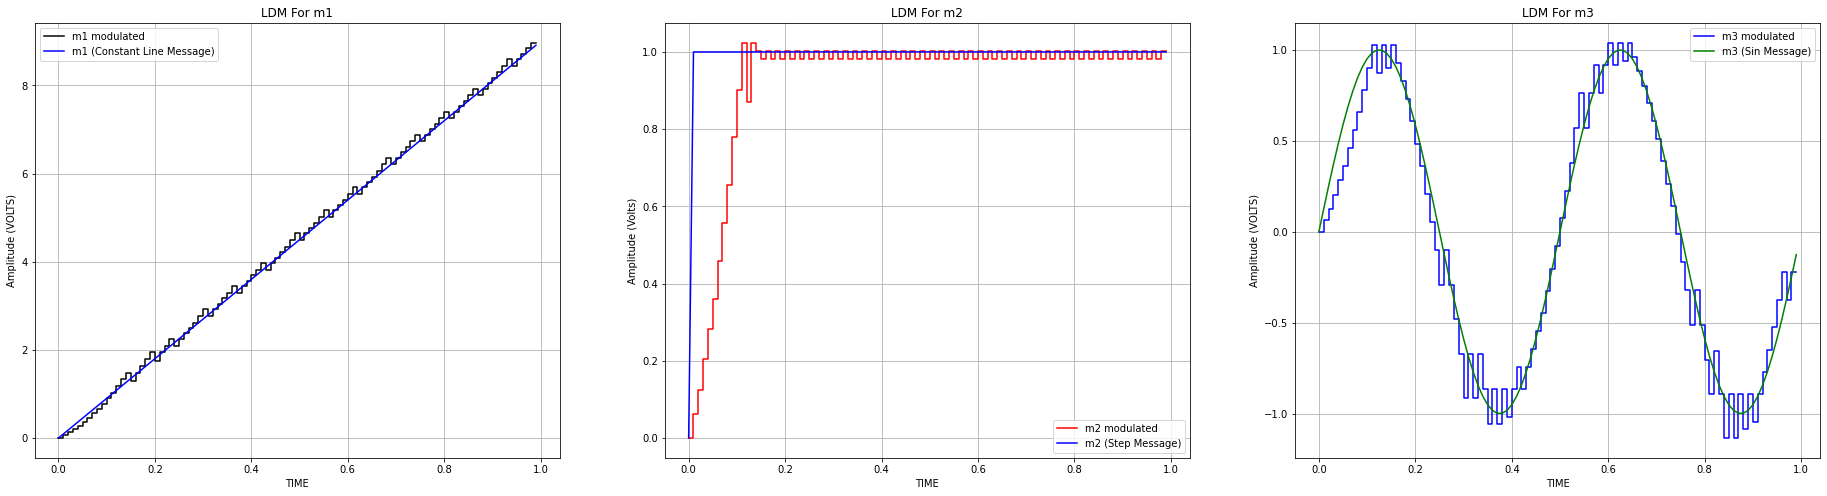

In [ ]:
Tstart=0
Tstop=1
Tstep=1e-2
t=np.arange(Tstart,Tstop,Tstep)
 
d1 = 2*np.pi/100                            # delta was halved
d2 = 2*np.pi/100
d3 = 2*np.pi/100

fm3=2                                       # Double the frequecny of the sin message 
Am3=1

fm2=0.5
Am2=1

m1 = 9*t                                     # Tribbling the slope for the Line Message
m2 = Am2*np.sign(np.sin(2*np.pi*fm2*t))      # Step Message
m3 = Am3*np.sin(2*np.pi*fm3*t)               # Sin Message

T = len(t)
n=np.arange(0,T,1)
N = len(n)

mq1 = np.zeros(N)
e1 = np.zeros(N)
eq1 = np.zeros(N)
bit_s1 = np.zeros(N)
dem1= np.zeros(N)
mdem1= np.zeros(N)

mq2 = np.zeros(N)
e2 = np.zeros(N)
eq2 = np.zeros(N)
bit_s2 = np.zeros(N)
dem2= np.zeros(N)
mdem2= np.zeros(N)

mq3 = np.zeros(N)
e3 = np.zeros(N)
eq3 = np.zeros(N)
bit_s3 = np.zeros(N)
dem3= np.zeros(N)
mdem3= np.zeros(N)


# Delta modulation process for m1

for x in n:

  if x==1:

    e1[x]=m1[x]                   
    eq1[x]=d1*np.sign(e1[x])
    mq1[x]=0      
         
  else: 

    e1[x]=m1[x]-mq1[x-1]          
    eq1[x]=d1*np.sign(e1[x])        
    mq1[x]=mq1[x-1]+eq1[x]  

# Adaptive process for m2

  if   eq1[x]+eq1[x-1]+eq1[x-2]==3*d1 or eq1[x]+eq1[x-1]+eq1[x-2]==-3*d1:                        # Increase the delta by 25% if 3 cosequtive equal values were modulated (for slope overload)
         d1=d1*1.25

  elif ((eq1[x]>0 and eq1[x-1]<0 and eq1[x-2]>0) or (eq1[x]<0 and eq1[x-1]>0 and eq1[x-2]<0)):   # Reduce delta at low slop regions   
          d1=d1/1.25                                                                                               

  
  if eq1[x] > 0:
     bit_s1[x] = 1
     dem1[x] = d1
  else:
    bit_s1[x] = 0 
    dem1[x] = -d1


# Delta modulation process for m2

  if x==1:

    e2[x]=m2[x]                   
    eq2[x]=d2*np.sign(e2[x])
    mq2[x]=0      
         
  else: 

    e2[x]=m2[x]-mq2[x-1]          
    eq2[x]=d2*np.sign(e2[x])        
    mq2[x]=mq2[x-1]+eq2[x]  

# Adaptive process for m2

  if   eq2[x]+eq2[x-1]+eq2[x-2]==3*d2 or eq2[x]+eq2[x-1]+eq2[x-2]==-3*d2:
         d2=d2*1.25

  elif ((eq2[x]>0 and eq2[x-1]<0 and eq2[x-2]>0) or (eq2[x]<0 and eq2[x-1]>0 and eq2[x-2]<0)): 
          d2=(2*np.pi/100)*(1/3)     

  if eq2[x] > 0:
     bit_s2[x] = 1
     dem2[x] = d2
  else:
    bit_s2[x] = 0 
    dem2[x] = -d2

# Delta modulation process for m3

  if x==1:

    e3[x]=m3[x]                   
    eq3[x]=d3*np.sign(e3[x])
    mq3[x]=0      
         
  else: 

    e3[x]=m3[x]-mq3[x-1]          
    eq3[x]=d3*np.sign(e3[x])        
    mq3[x]=mq3[x-1]+eq3[x]  

# Adaptive process for m3

  if   eq3[x]+eq3[x-1]+eq3[x-2]==3*d3 or eq3[x]+eq3[x-1]+eq3[x-2]==-3*d3:
         d3=d3*1.25

  elif ((eq3[x]>0 and eq3[x-1]<0 and eq3[x-2]>0) or (eq3[x]<0 and eq3[x-1]>0 and eq3[x-2]<0) and dem3[x]>=d3): 
          d3=d3/1.25          
 
  if eq3[x] > 0:
     bit_s3[x] = 1
     dem3[x] = d3
  else:
    bit_s3[x] = 0 
    dem3[x] = -d3


  mdem1[x] = sum(dem1)
  mdem2[x] = sum(dem2)
  mdem3[x] = sum(dem3)


#Plotting the modulated signals


f = plt.figure(figsize=(32,8))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)


ax1.step(t,mq1,'k',label='m1 modulated')
ax1.plot(t,m1,'b',label='m1 (Constant Line Message)')
ax1.grid()
ax1.set_xlabel('TIME')
ax1.set_ylabel('Amplitude (VOLTS)')
ax1.set_title('LDM For m1')
ax1.legend()

ax2.step(t,mq2,'r',label='m2 modulated')
ax2.plot(t,m2,'b',label='m2 (Step Message)')
ax2.grid()
ax2.set_xlabel('TIME')
ax2.set_ylabel('Amplitude (Volts)')
ax2.set_title('LDM For m2')
ax2.legend()

ax3.step(t,mq3,'b',label='m3 modulated')
ax3.plot(t,m3,'g',label='m3 (Sin Message)')
ax3.grid()
ax3.set_xlabel('TIME')
ax3.set_ylabel('Amplitude (VOLTS)')
ax3.set_title('LDM For m3')
ax3.legend()



 **Exercise**

- *From the above results, dicuss in your report the effects of both, slope overload and granular noises when using DCDM. Have they increased or decreased? and WHY*.

### ***A closer Look at DCDM, and its Line Coding***

- This sub-section serves to clarify the operation of DCDM, and its line coding. It also tests if DCDM line coding differs from LDM or not.

- A sin wave message ($m3(t)=A_msin(2 \pi f_mt)$) was used.

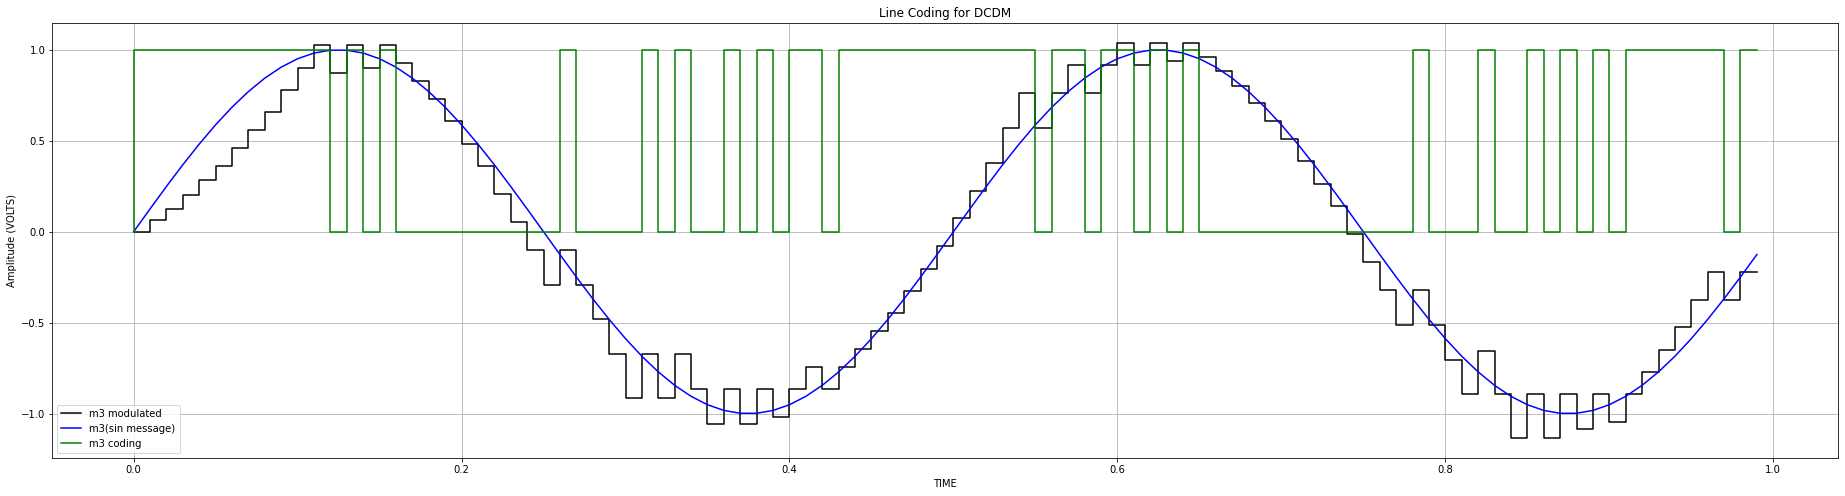

In [ ]:
plt.figure(figsize=(32,8))
plt.step(t,mq3,'k',label='m3 modulated')
plt.plot(t,m3,'b',label='m3(sin message)')
plt.step(t,bit_s3,'g',label='m3 coding')
plt.xlabel('TIME')
plt.ylabel('Amplitude (VOLTS)')
plt.title('Line Coding for DCDM')
plt.legend()
plt.grid()

**Exercise** 

Write down the bit sequence for half a period (t=0.5s), **AND** discuss if there is a differencre between the line coding for both delta modulation types. 

### **Performance of Adaptive (nonlinear/DCDM) Delta Modulation on the 3 Messages alg(2)**

- This part shows another algorithm for adaptive modulation. 

- The basic concept is that the slope of the message is constantly tested to check if the delta showed change based on the slope.

- The message frequency was set to 2Hz, and delta or step size to $2*\pi/100$.

*Note: This alg works for specific signals with finite slopes.*

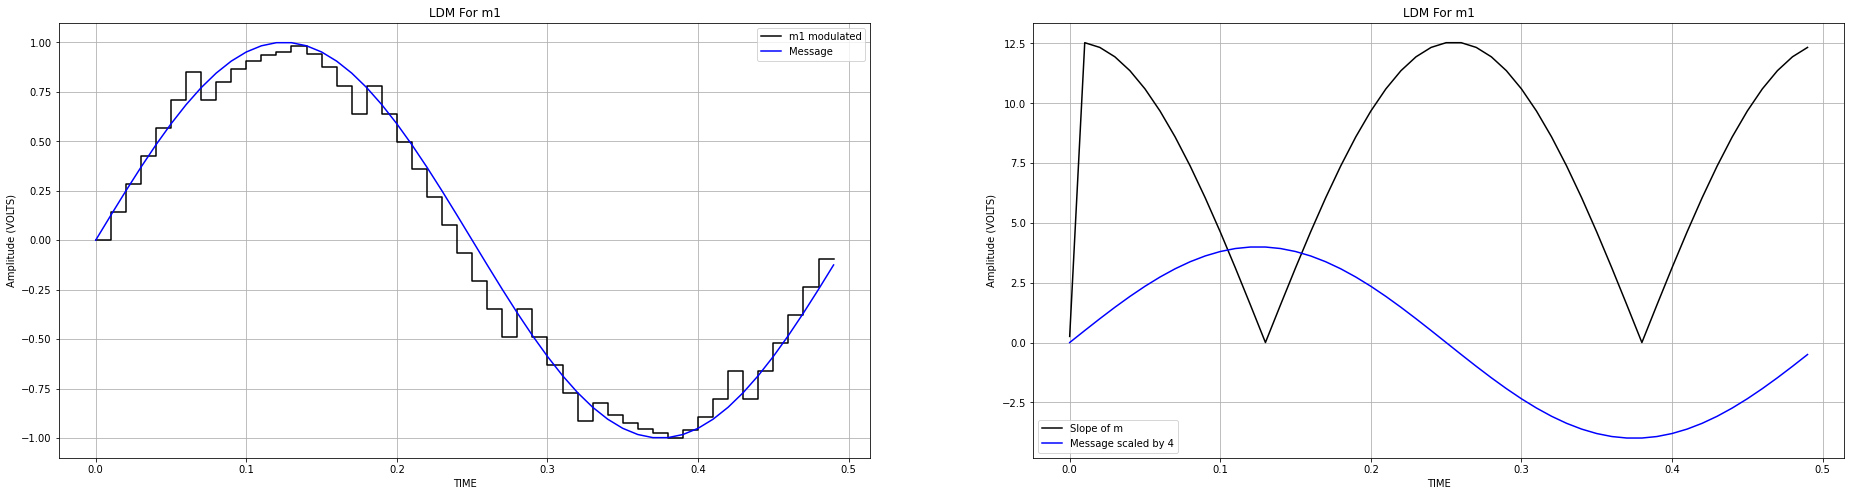

In [ ]:
Tstart=0
Tstop=0.5
Tstep=1e-2
t=np.arange(Tstart,Tstop,Tstep)
 
d = 2*np.pi/100

fm=2     # frequency of message signal
Am=1     # amplitude of message signal

m=Am*np.sin(2*math.pi*fm*t)


T = len(t)
n=np.arange(0,T,1)
N = len(n)

mq = np.zeros(N)
e = np.zeros(N)
eq = np.zeros(N)
bit_s = np.zeros(N)
dem= np.zeros(N)
mdem= np.zeros(N)
slop=np.zeros(N)


for x in n:

# Adaptive alg2 

  slop[x]= abs((m[x]-m[x-1])/(t[x]-t[x-1]))    # Calculating the slope per sample

  if slop[x] > slop[x-1]*1.2:                  # Vary the step size based on previous slop values
    d=1.5*d                                    # Increase step size if slpoe is icreasing
     
    
  elif slop[x] < slop[x-1]*(1/(1.2)):
    d=d/1.5                                    # Decrease step size if slpoe is decreasing


# Delta modulation process  

  if x==1:

    e[x]=m[x]                   
    eq[x]=d*np.sign(e[x])
    mq[x]=0      
         
  else: 

    e[x]=m[x]-mq[x-1]          
    eq[x]=d*np.sign(e[x])        
    mq[x]=mq[x-1]+eq[x]  
    
  if eq[x] > 0:
     bit_s[x] = 1
     dem[x] = d

  else:
    bit_s[x] = 0
    dem[x] = -d 

# Plotting relevant signals

f = plt.figure(figsize=(32,8))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.step(t,mq,'k',label='m1 modulated')
ax1.plot(t,m,'b',label='Message')
ax1.grid()
ax1.set_xlabel('TIME')
ax1.set_ylabel('Amplitude (VOLTS)')
ax1.set_title('LDM For m1')
ax1.legend()

ax2.plot(t,slop,'k',label='Slope of m')
ax2.plot(t,m*4,'b',label='Message scaled by 4')
ax2.grid()
ax2.set_xlabel('TIME')
ax2.set_ylabel('Amplitude (VOLTS)')
ax2.set_title('LDM For m1')
ax2.legend()


**Exercise and Discussion** 

- Increase fm to **3Hz** and discuss the difference.
- What should be changed in the code for proper modulation? 

### **Demodulation of LDM**

- After the modulation process, reconstruction of the original signal (($m3(t)=A_msin(2 \pi f_mt)$)) takes place, where the recieved bit sequence is decoded and integrated to reconstruct the staircase signal at the transmitter. Finally, a LPF was used for a smoother signal.  

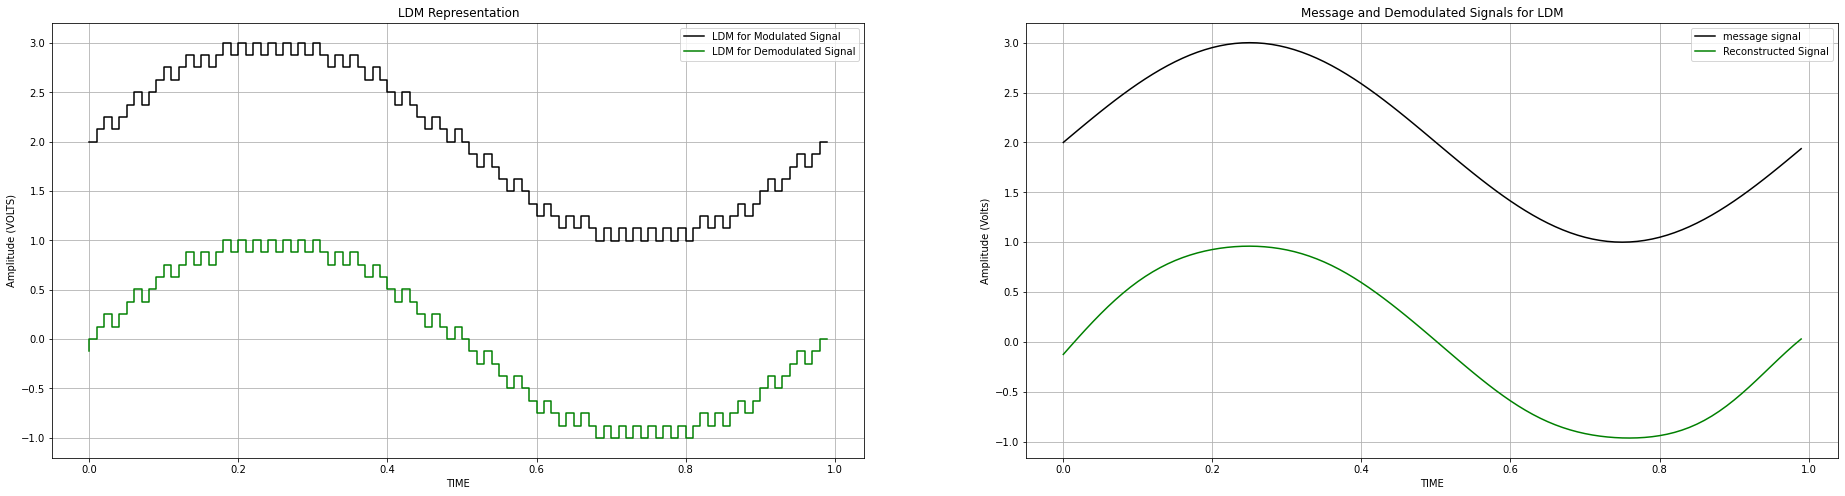

In [ ]:
Tstart=0
Tstop=1
Tstep=1e-2
t=np.arange(Tstart,Tstop,Tstep)
 
d_ldm = 4*np.pi/100                                              # Step size or delta

fm_ldm=1                                                         # Frequency of message signal
Am_ldm=1                                                         # Amplitude of message signal

m_ldm = Am_ldm*np.sin(2*math.pi*fm_ldm*t)

T = len(t)
n=np.arange(0,T,1)
N = len(n)

mq_ldm = np.zeros(N)
e_ldm =np.zeros(N)
eq_ldm = np.zeros(N) 
bit_s_ldm = np.zeros(N)
dem_ldm = np.zeros(N)
mdem_ldm = np.zeros(N)

# Delta modulation process 

for x in n:

  if x==1:
    e_ldm[x]=m_ldm[x]                   
    eq_ldm[x]=d_ldm*np.sign(e_ldm[x])
    mq_ldm[x]=0                      
                    
         
  else: 

    e_ldm[x]=m_ldm[x]-mq_ldm[x-1]          
    eq_ldm[x]=d_ldm*np.sign(e_ldm[x])        
    mq_ldm[x]=mq_ldm[x-1]+eq_ldm[x]                    


  if eq_ldm[x] > 0:
     bit_s_ldm[x] = 1
     dem_ldm[x] = d_ldm                                                  

  else:
    bit_s_ldm[x] = 0
    dem_ldm[x] = -d_ldm 


  mdem_ldm[x] = sum(dem_ldm)


#Adding LPF

fs = 1/Tstep                                                        # Sampling frequency


fc = 3+fm_ldm                                                       # Cut-off frequency of the filter
w = fc / (fs / 2)                   
b, a = signal.butter(5, w, 'low')                                   # Butterworth LPF 
output = signal.filtfilt(b, a, mdem_ldm)

#Plotting

f = plt.figure(figsize=(32,8))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)


ax1.step(t,mq_ldm+2,'k',label='LDM for Modulated Signal')             # Shifting by 2 volts for visualization
ax1.step(t,mdem_ldm,'g',label='LDM for Demodulated Signal')
ax1.grid()
ax1.set_xlabel('TIME')
ax1.set_ylabel('Amplitude (VOLTS)')
ax1.set_title('LDM Representation')
ax1.legend()

ax2.plot(t,m_ldm+2,'k',label='message signal')                        # Shifting by 2 volts for visualization
ax2.plot(t,output,'g',label='Reconstructed Signal')
ax2.grid()
ax2.set_xlabel('TIME')
ax2.set_ylabel('Amplitude (Volts)')
ax2.set_title('Message and Demodulated Signals for LDM')
ax2.legend()



**Discuss the difference between the original message and the reconstructed one when:** 

- fm_ldm is set to **4Hz**, and **reducing delta by 50%**. 

### **Demodulation of DCDM (alg1)**

- The following demonstrates the demodulation process of DCDM(alg1) for a sin message (($m3(t)=A_msin(2 \pi f_mt)$)). 

Note here that **fm3** was set to **2Hz** in comparison to the LDM Demodulation part (where fm_ldm was 1Hz), and **delta** was **halved** to observe the effectiveness of DCDM. 

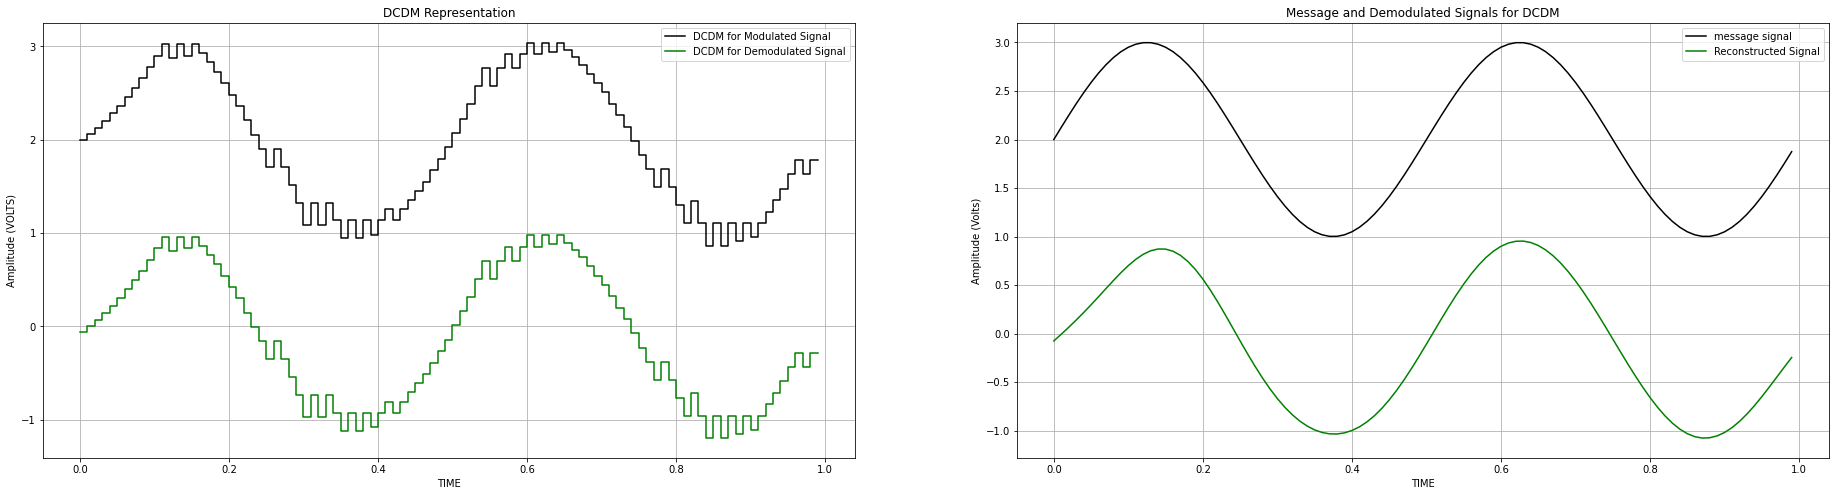

In [ ]:
Tstart=0
Tstop=1
Tstep=1e-2
t=np.arange(Tstart,Tstop,Tstep)
 
d = 2*np.pi/100

fm=2     # frequency of message signal
Am=1     # amplitude of message signal

m=Am*np.sin(2*math.pi*fm*t)

T = len(t)
n=np.arange(0,T,1)
N = len(n)

mq = np.zeros(N)
e =np.zeros(N)
eq = np.zeros(N) 
bit_s = np.zeros(N)
dem = np.zeros(N)
mdem = np.zeros(N)


# Delta modulation process

for x in n:

  if x==1:

    e[x]=m[x]                   
    eq[x]=d*np.sign(e[x])
    mq[x]=0      
         
  else: 

    e[x]=m[x]-mq[x-1]          
    eq[x]=d*np.sign(e[x])        
    mq[x]=mq[x-1]+eq[x]  


    if  eq[x] > 0:
        bit_s[x] = 1
        dem[x]=d  

    else:
      bit_s[x] = 0 
      dem[x]=-d  
      
# Adaptive alg1

    if   eq[x]+eq[x-1]+eq[x-2]==3*d or eq[x]+eq[x-1]+eq[x-2]==-3*d:
         d=d*1.25

    elif ((eq[x]>0 and eq[x-1]<0 and eq[x-2]>0) or (eq[x]<0 and eq[x-1]>0 and eq[x-2]<0) and (dem[x]>0.5*d)): 
          d=d/1.25             

  
    
  mdem[x]=sum(dem) 

    

 # Adding LPF

fs = 1/Tstep                                                        # Sampling frequency


fc = 3+fm                                                           # Cut-off frequency of the filter
w = fc / (fs / 2)                   
b, a = signal.butter(5, w, 'low')                                   # Butterworth LPF with order of 5
output = signal.filtfilt(b, a, mdem)

# Plotting relevant signals

f = plt.figure(figsize=(32,8))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)


ax1.step(t,mq+2,'k',label='DCDM for Modulated Signal')              # Shifting by 2 volts for visualization
ax1.step(t,mdem,'g',label='DCDM for Demodulated Signal')
ax1.grid()
ax1.set_xlabel('TIME')
ax1.set_ylabel('Amplitude (VOLTS)')
ax1.set_title('DCDM Representation')
ax1.legend()

ax2.plot(t,m+2,'k',label='message signal')                          # Shifting by 2 volts for visualization
ax2.plot(t,output,'g',label='Reconstructed Signal')
ax2.grid()
ax2.set_xlabel('TIME')
ax2.set_ylabel('Amplitude (Volts)')
ax2.set_title('Message and Demodulated Signals for DCDM')
ax2.legend()




**Exercise and discussion**

- Set fm to **3Hz** and compare the result with LDM at **fm_ldm = 4Hz** and delta equal to 2*pi/100.
- What could be concluded from the above result about DCDM.

